<a href="https://colab.research.google.com/github/tree-jhk/DeepLab_V3_PyTorch_simple_example/blob/main/DeepLab_V3_PyTorch_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

준비물: PyTorch 설치, semantic segmentation할 이미지  

세팅: CoLab 이용, GPU 가속 사용  

GPU 가속 사용 방법: 상단 메뉴에서 [런타임] 클릭 → [런타임 유형 변경] 클릭 → [하드웨어 가속기] 탭에서 [GPU] 선택 → 저장

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval() #컴파일 오래 걸립니다.

해당 코드는 이미지를 불러오는 방법으로 URL을 이용합니다.  

이미지 파일(PNG, JPG, 등)을 URL로 바꾸는 방법:  

[https://ifh.cc/] 접속 → 이미지 업로드 → 이미지 주소 복사(공유 주소 x)

URL로 변경하면, 변경된 URL에서는 이미지 제목이 바뀝니다. 바뀐 제목으로 사용합니다.

In [ ]:
# Download an example image from the pytorch website
import urllib

url, filename = ("https://ifh.cc/g/HHcadB.jpg", "HHcadB.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

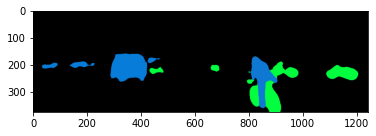

In [ ]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()